In [1]:
from numpy.linalg import svd

In [12]:
A = np.array([[3, -1], [1, 3], [1, 1]])
A

array([[ 3, -1],
       [ 1,  3],
       [ 1,  1]])

In [4]:
U, S, VT = svd(A) # VT 는 트렌스포즈 끝난 폼으로 나옴

In [5]:
U

array([[-4.08248290e-01,  8.94427191e-01, -1.82574186e-01],
       [-8.16496581e-01, -4.47213595e-01, -3.65148372e-01],
       [-4.08248290e-01, -1.94289029e-16,  9.12870929e-01]])

In [6]:
S

array([3.46410162, 3.16227766])

In [7]:
VT

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [11]:
U@np.diag(S, 1)[:, 1:]@VT

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

In [17]:
U, S, VT = svd(A,full_matrices = False)

AV = SU

# PCA 주성분분석

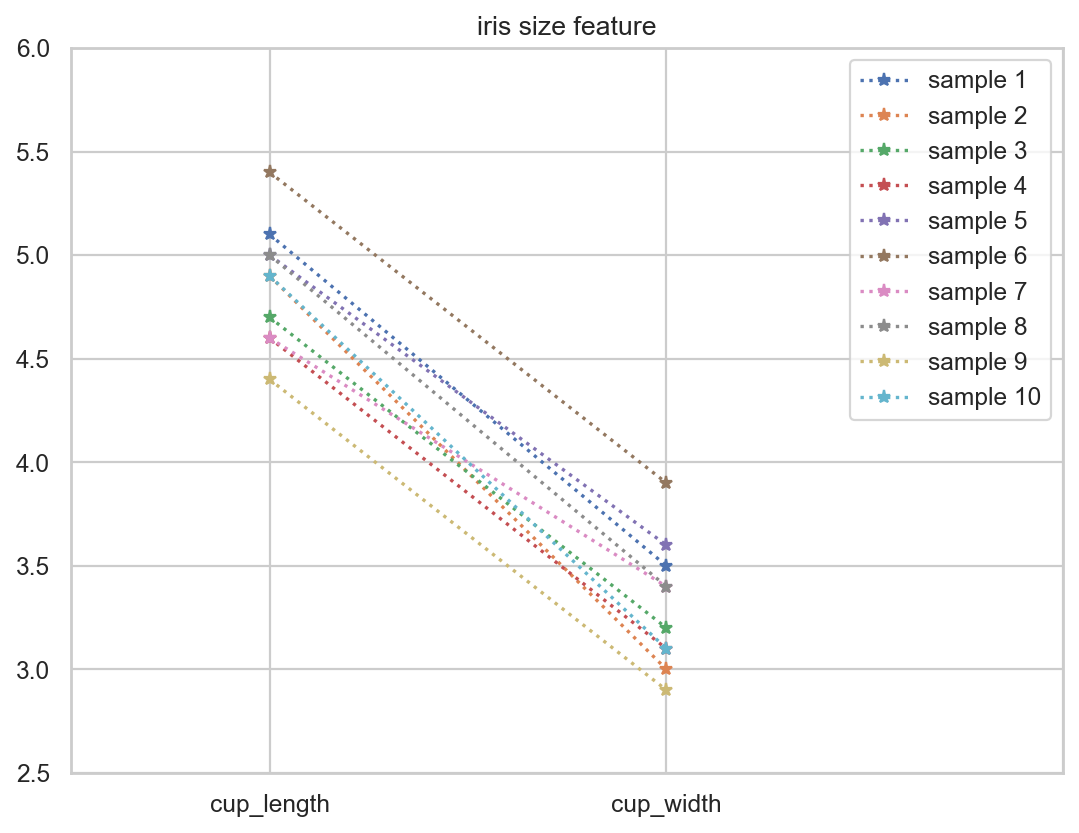

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10
X = iris.data[:N, :2]

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='g')
plt.plot(X.T, ':*')
plt.xticks(range(4), ["cup_length", "cup_width"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("iris size feature")
plt.legend(["sample {}".format(i+1) for i in range(N)])
plt.show()
%matplotlib inline

# latent variable : 잠재변수가 선형관계를 가지고 있다고 가정

### PCA를 간단하게 표현하자면 


<img src="IMG_BC33BC3CA043-1.jpeg" width="1500">

# scikitlearn PCA 기능

<img src="IMG_FD59326BCE69-1 2.jpeg" width="1500">

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10
X = iris.data[:N, :2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [42]:
from sklearn.decomposition import PCA

In [52]:
pca1 = PCA(n_components=1)

In [53]:
X_low = pca1.fit_transform(X)

In [54]:
X_low # lantant 값 원점이 평균부터여서 마이너스 값도 나옴

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [62]:
X2 = pca1.inverse_transform(X_low)
X2

array([[5.06676112, 3.53108532],
       [4.7240094 , 3.1645881 ],
       [4.73047393, 3.17150049],
       [4.63393012, 3.06826822],
       [5.06999338, 3.53454152],
       [5.40628057, 3.89412635],
       [4.78359423, 3.22830091],
       [4.97021731, 3.42785306],
       [4.44084251, 2.86180369],
       [4.77389743, 3.21793233]])

In [59]:
pca1.mean_

array([4.86, 3.31])

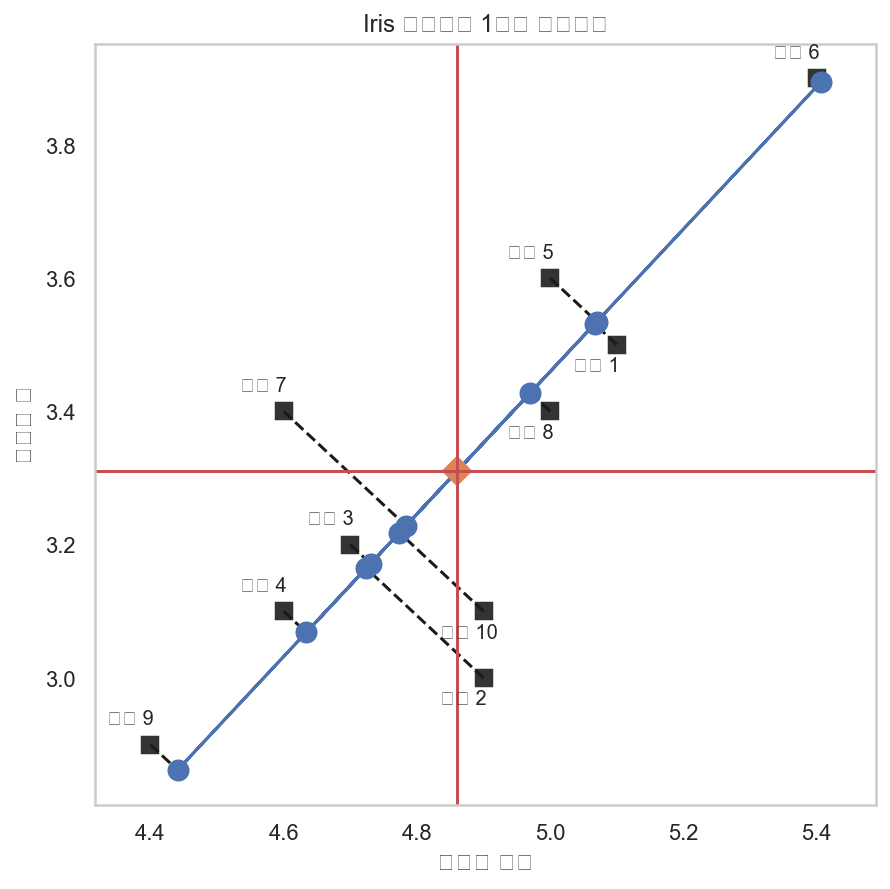

In [63]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()


# pca 실습 iris

# 연습문제 3. 5. 1

In [64]:
from sklearn.datasets import load_iris

In [65]:
iris = load_iris()
X = iris.data

In [66]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [71]:
from sklearn.decomposition import PCA

In [72]:
iris_pca = PCA(n_components=1)

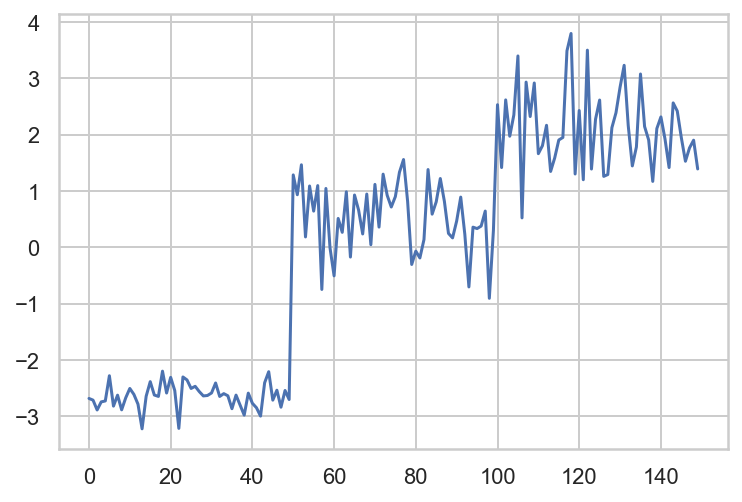

In [77]:
iris_pca.fit_transform(X)
plt.plot(iris_pca.fit_transform(X))

# Why ?? PCA 왜 해야하나? 

데이터의 종속에 가까운 데이터를 데이터의 종류를 버려야 하는데 이때, 차원을 줄여서(압축) 독립으로 만든다

# 주식가격의  PCA

In [78]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

In [79]:
symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]

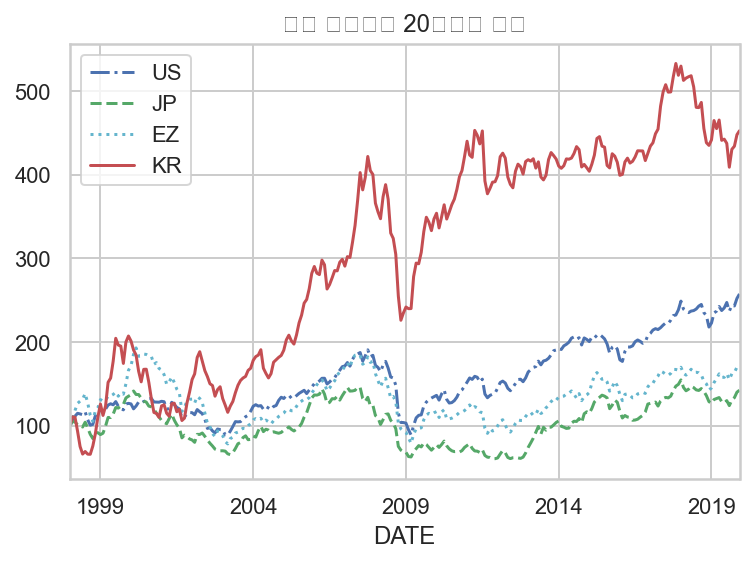

In [85]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2019, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]

data.plot(style=styles)

plt.title("세계 주요국의 20년간의 주가")
plt.show()

In [92]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :22])

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31  2003-12-31  \
US     14.249290   10.800392    1.094171   -9.638213  -17.680773   23.135271   
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968   19.628102   
EZ     21.308040   36.872314    1.375330  -21.857080  -30.647772   12.066127   
KR     10.411582   87.623876  -46.975114   27.644005    4.448180   15.121124   

DATE  2004-12-31  2005-12-31  2006-12-31  2007-12-31  ...  2010-12-31  \
US     14.233654    9.135500   16.669812    7.947193  ...    9.341795   
JP      9.945947   44.912009    2.113724   -8.489431  ...    0.138706   
EZ     10.551998   22.994959   19.584584    6.402134  ...    2.326218   
KR      9.091136   53.381919    5.953828   33.925391  ...   21.509189   

DATE  2011-12-31  2012-12-31  2013-12-31  2014-12-31  2015-12-31  2016-12-31  \
US     -5.543249   13.010846   21.299603    6.609915   -5.743802    8.675742   
JP    -18.221219   11.344079   54.198614   12.293250    9.842221   -1.725

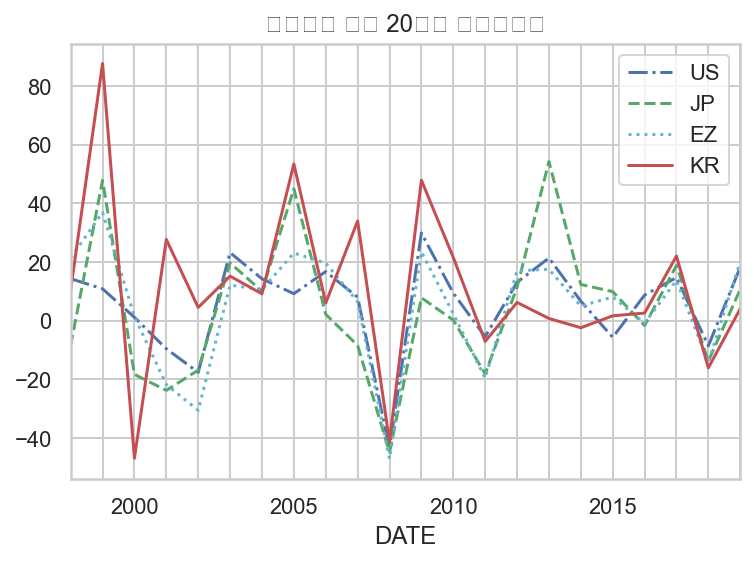

In [95]:
df.T.plot(style=styles)
plt.title("주요국의 과거 20년간 연간수익률")
plt.xticks(df.columns)
plt.show()

In [96]:
profit_pca = PCA(n_components=1)
w = profit_pca.fit_transform(df)

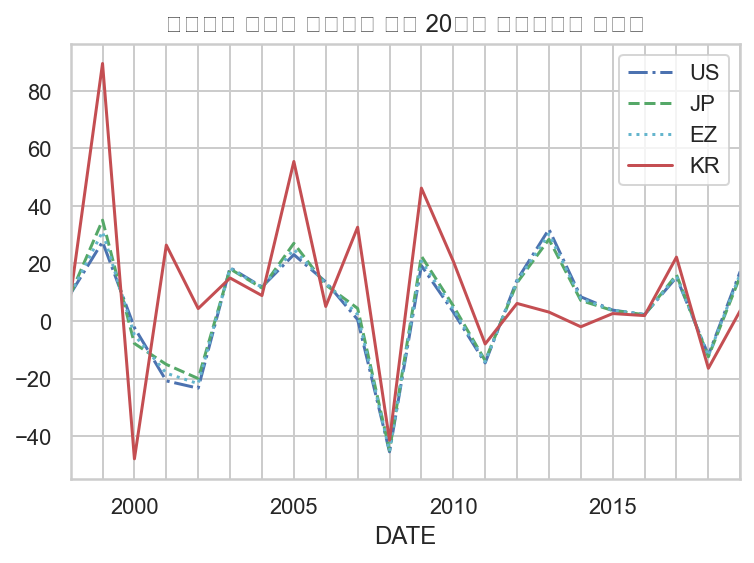

In [98]:
df_i = pd.DataFrame(profit_pca.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title("주성분을 사용한 주요국의 과거 20년간 연간수익률 근사치")
plt.xticks(df.columns)
plt.show()